Ce script permet de faire des manipulation des datasets préalablement crées (les datasets ne sont pas disponibles sur GitHub):


*  **CANARIES_GMSEG__$i$.csv** : avec $i \in (2,..,8)$ :  ces fichiers contiennent des cartes de SST segmentées par mélanges de gaussiens pour des cartes de la SST pour le système des canaries du 01/2001 jusqu'à 12/2015, les histogrammes correspondants à chaque segmentation et un fichier CSV qui contient les statistiques de chaque cluster, le paramètre $i$ refère au nombre de clusters urilisées pour la segmentation. La génération de tous ces fichiers a pris 1h33min.

*   **UPW_UISST.csv** : contient des séries temporelles de l'indicateur d'upwelling, l'extension spatiale de l'upwelling et la température médiane du cluster d'upwelling pour le système des canaries et cela chaque valeur de latitude. 


Dans ce notebook les latitudes et longitudes maximales et minimales sont : 
**min_lat = 20, max_lat = 35, min_lon = -21, max_lon = -7**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## Visualisation des carte segmentée de la SST pour le système des canaries :

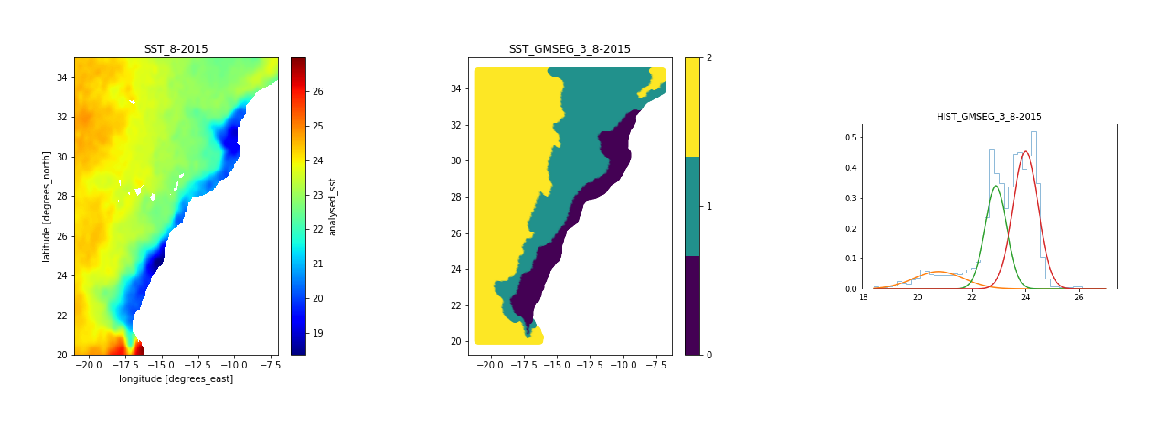

 cluster    date       mean       std
       0  8/2015  20.692470  0.836223
       1  8/2015  22.847338  0.311500
       2  8/2015  24.038681  0.417659


In [0]:
# Plot de la carte SST, la segmentation de la carte SST ainsi que l'histogramme de SST avec les gaussiennes estimées (chaque gaussienne correspond à un cluster).
################################################################################
def get_SEG(n_components, year, month):
  """
  n_components  : nombre de gaussiennes à estimer.
  year : Année pour laquelle on veut faire la segmentation.
  Month : Mois pour lequel on veut faire la segmentation.
  """
  fig, axes = plt.subplots(1,3, figsize = (20,9))
  SST = plt.imread('gdrive/My Drive/UISST_pH_analysis/Datasets/CANARIES_SST/SST_'+str(month)+'-'+str(year)+'.png')
  axes[0].imshow(SST)
  axes[0].axis('off')
  SST_SEG = plt.imread('gdrive/My Drive/UISST_pH_analysis/Datasets/CANARIES_GMSEG_'+str(n_components)+'/SST_GMSEG_'+str(n_components)+'_'+str(month)+'-'+str(year)+'.png')
  axes[1].imshow(SST_SEG)
  axes[1].axis('off')
  HIST = plt.imread('gdrive/My Drive/UISST_pH_analysis/Datasets/CANARIES_GMSEG_'+str(n_components)+'/HIST_GMSEG_'+str(n_components)+'_'+str(month)+'-'+str(year)+'.png')
  axes[2].imshow(HIST)
  axes[2].axis('off')
  plt.show()
  CLUSTERS_STATS = pd.read_csv('gdrive/My Drive/UISST_pH_analysis/Datasets/CANARIES_GMSEG_'+str(n_components)+'/SEG_'+str(n_components)+'stats.csv', header = None)
  CLUSTERS_STATS.columns = ['cluster', 'date', 'mean', 'std']
  print(CLUSTERS_STATS[CLUSTERS_STATS['date'] == '8/2015'].to_string(index=False))
################################################################################

get_SEG(n_components = 3, year = 2015 , month = 8)

## Exploration des séries temporelles de l'indicateur d'uwpelling :

In [0]:
# read csv files
df_upwsst = pd.read_csv('gdrive/My Drive/UISST_pH_analysis/Datasets/UPW_UISST_CCI_DATA_4.csv') # get file with upwelling indicator
df_upwsst.head()
df_upwsst['date'] = pd.to_datetime(df_upwsst['date'])
df_upwsst = df_upwsst.set_index('date')
df_upwsst.head()

,ext_upwelling,lat,medianSST_upw,ui_sst
date,,,,
2001-01-01,1.55,20.875000,17.692255,1.926453
2001-01-01,1.55,20.674999,17.641613,2.121615
2001-01-01,0.40,27.475000,17.741772,1.644352
2001-01-01,0.00,20.424999,18.542900,-0.268061
2001-01-01,0.30,25.625000,17.446611,2.563547



*  **date** : la date pour laquelle nous avons calculé l'indicateur d'upwelling, les dates sont représntées par le premier jousr de chaque mois.
*   **lat** : La latitude pour laquelle on a calculé l'indicateur d'upwelling.
*   **ext_upwelling** : L'extension spatiale de l'upwelling à cette latitude en degré.
*   **ui_ss**t : L'inidcateur d'upwelling en degré Celsius.
*   **mediaSST_upw** : la température médiane du cluster d'upweling pour la latitude lat en degré Celsius.


In [0]:
# Pour récupérer les valeurs décrites ci-dessous pour une latitude et date donnée, il suffit de renseigner les paramètres ci-sessous (lat, month et year)
lat = 30
month = 6 
year = 2013
################################################################################
df_upwsst.loc[(df_upwsst.index == str(year)+'-'+str(month)+'-1') & (df_upwsst['lat'] == df_upwsst.iloc[(df_upwsst['lat']- lat).abs().argsort()[:1]].lat.values[0])]
################################################################################

,ext_upwelling,lat,medianSST_upw,ui_sst
date,,,,
2013-06-01,0.55,29.975,17.664999,1.196333


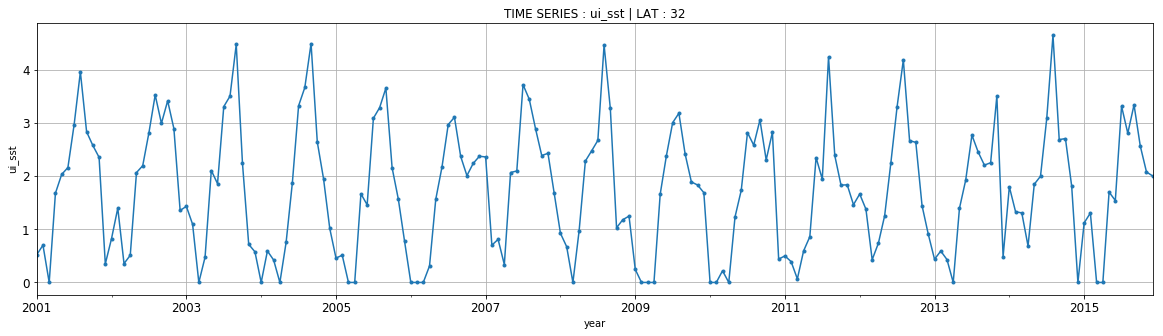

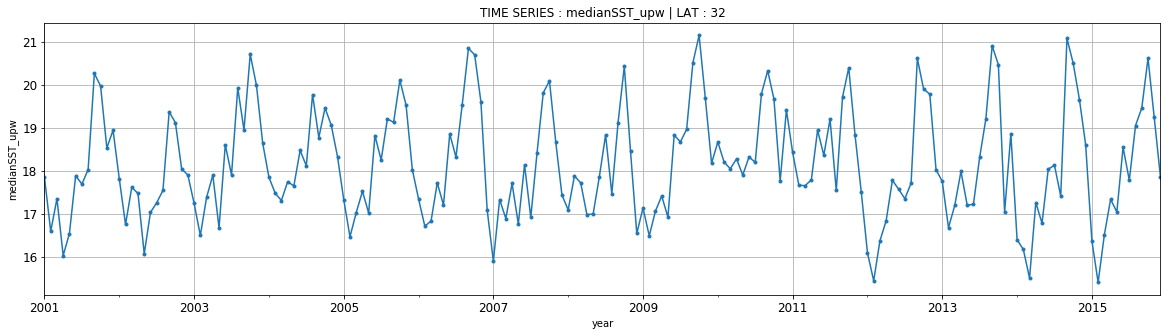

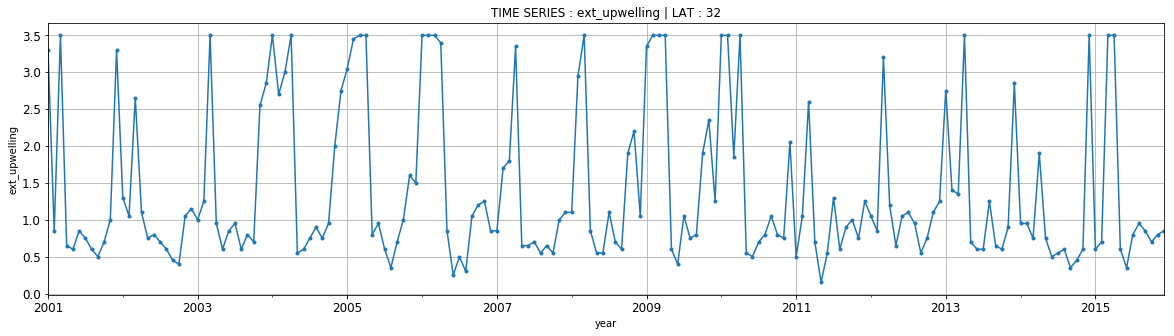

In [0]:
# La méthode ci-dessous permet d'afficher les séries temporelles des différentes variables présentes dans le fichier CSV.
################################################################################
def plot_timeseries(var, lat):
  """
  var : takes one of these values : ui_sst, medianSST_upw or ext_upwelling
  lat : latitude
  """
  lat_com = df_upwsst.iloc[(df_upwsst['lat']- lat).abs().argsort()[:1]].lat.values[0]
  df_upwsst[df_upwsst['lat'] == lat_com][var].plot(figsize=(20,5), fontsize=12, marker = '.')
  plt.grid()
  plt.xlabel('year')
  plt.ylabel(var)
  plt.title('TIME SERIES : {} | LAT : {}'.format(var, lat))
  plt.show()
################################################################################
# Pour afficher la série, il suffit de changer les valeurs des paramètres 'var' et 'lat' par les valeurs souhaitées.
plot_timeseries(var = 'ui_sst', lat = 32)
plot_timeseries(var = 'medianSST_upw', lat = 32)
plot_timeseries(var = 'ext_upwelling', lat = 32)

In [0]:
# le script ci-dessous permet de récupérer les corrélations entre les séries temporelles pour une latitude donnée. 
lat = 30
################################################################################
lat = df_upwsst.iloc[(df_upwsst['lat']- lat).abs().argsort()[:1]].lat.values[0]
df_upwsst[df_upwsst['lat'] == lat].drop(columns=['lat']).corr()

,ext_upwelling,medianSST_upw,ui_sst
ext_upwelling,1.000000,-0.308135,-0.110531
medianSST_upw,-0.308135,1.000000,0.418505
ui_sst,-0.110531,0.418505,1.000000


On constate que le coefficient de corrélation entre **ext_upwelling** et **ui_sst** ets de -0.68, cela signifie que les upwelling assez forts ont une tendance à avoir une extension géographique faible.

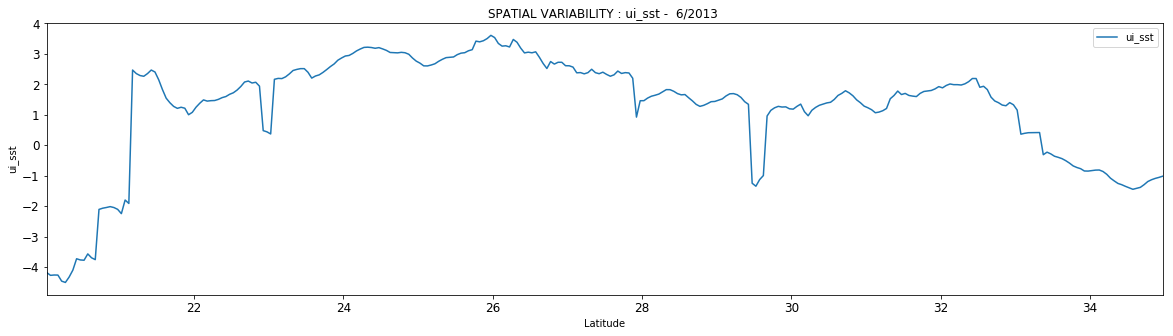

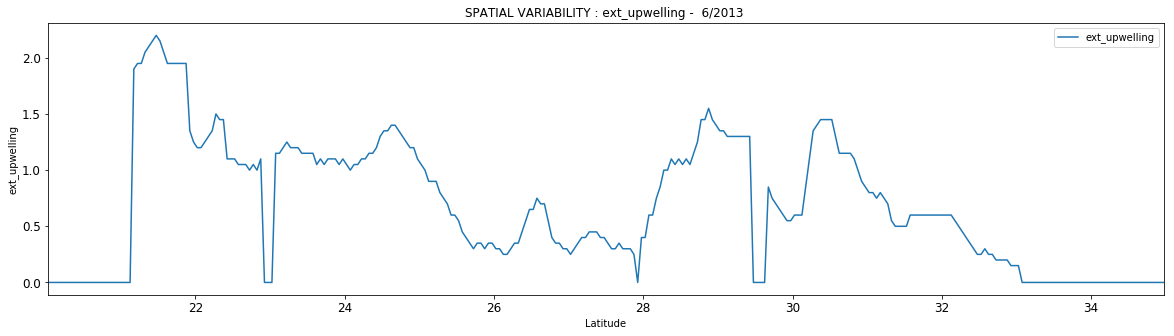

In [0]:
# Visualisation de la variabilité spatiale des variables
################################################################################
def spatial_variability(month, year, var):
  """
  var :  La variable pour laquelle on souhaite visualiser la variabilité spatiale
  """
  df_upwsst.loc[(df_upwsst.index == str(year)+'-'+str(month)+'-1'), ['lat',var]].sort_values(['lat'], ascending = True).plot('lat',var, figsize=(20,5), fontsize=12)
  plt.xlabel('Latitude')
  plt.ylabel(var)
  plt.title('SPATIAL VARIABILITY : {} -  {} '.  format(var, str(month)+'/'+str(year)))
  plt.show()
################################################################################
spatial_variability(month = 6, year = 2013, var = 'ui_sst')
spatial_variability(month = 6, year = 2013, var = 'ext_upwelling')

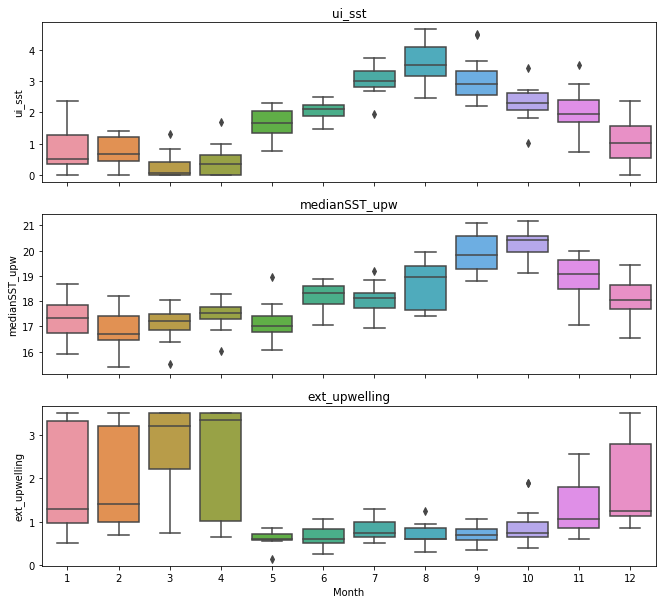

In [0]:
# Ce script permet de visualiser la variabilié mensuelle de chacune des variables pour une latitude donnée.
lat = 32
################################################################################
df_upwsst['Year'] = df_upwsst.index.year
df_upwsst['Month'] = df_upwsst.index.month
df_boxplot = df_upwsst[df_upwsst['lat']  == df_upwsst.iloc[(df_upwsst['lat']- lat).abs().argsort()[:1]].lat.values[0]]
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['ui_sst','medianSST_upw', 'ext_upwelling'], axes):
  sns.boxplot(data=df_boxplot, x='Month', y=name, ax=ax)
  ax.set_title(name)
  # Remove the automatic x-axis label from all but the bottom subplot
  if ax != axes[-1]:
      ax.set_xlabel('')